# Bipolar disorder and response to lithium: blood

Dataset Files: 
* gds5393.csv 
* meta-gds5393.csv

**Introdução**

Bipolar disorder is a mental condition characterized by highly variable mood episodes, with periods of euphoria or mania (known as manic episodes) alternating with periods of deep depression (known as depressive episodes). Treatment for bipolar disorder usually includes therapy and medication.

One of the most common medications used to treat bipolar disorder is lithium. Lithium is a mineral that acts as a mood stabilizer and is effective in preventing manic and depressive episodes in people with bipolar disorder. It works by helping to balance the levels of certain chemicals in the brain called neurotransmitters, which are responsible for transmitting information between brain cells.


**Summary**

Analysis of peripheral blood from patients with bipolar disorder before and 1 month after lithium treatment. Response of patients to lithium assessed after 6 months. Results identify a gene expression signature for the response to lithium treatment in patients with bipolar disorder.

This particular dataset, with 48107 rows and 120 columns, contains gene expression data from blood samples from patients with bipolar disorder and patients without bipolar disorder, some of whom were receiving lithium treatment and some who were not.
The file meta-gds5393 contains class labels.


### 1. Carregamento e analise dos dados e metadados do dataset

In [1]:
# Importar bibliotecas necessárias para o processamento
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

# Ler dados usando a lib pandas
data = pd.read_csv("gds5393.csv", sep=',', index_col = 0)
meta = pd.read_csv("meta-gds5393.csv", sep=',', index_col = 0)

**1.1 Descrição e caraterização dos dados do dataset**

In [2]:
# analise dos dados
data.describe()

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
count,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,...,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000,47323.000000
mean,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,...,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577,7.468577
std,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,...,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915,1.287915
min,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,...,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480,6.419480
25%,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735,6.815735,6.815730,6.815730,...,6.815735,6.815735,6.815735,6.815735,6.815730,6.815735,6.815735,6.815735,6.815735,6.815735
50%,6.940240,6.940240,6.940240,6.940240,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,...,6.940240,6.940230,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240,6.940240
75%,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,...,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960,7.437960
max,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,...,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700,15.017700


In [3]:
# Dimensao dos dados
data.values.shape

(48107, 120)

In [4]:
# Tipo de dados do conjunto dados
data.dtypes

GSM1105438    float64
GSM1105486    float64
GSM1105487    float64
GSM1105490    float64
GSM1105491    float64
               ...   
GSM1105525    float64
GSM1105552    float64
GSM1105452    float64
GSM1105453    float64
GSM1105456    float64
Length: 120, dtype: object

In [5]:
# analise dos metadados
meta.describe()

,sample,agent,other,time,individual,description
count,120,120,120,120,120,120
unique,120,2,2,2,60,120
top,GSM1105438,control,non-responder,baseline,OPT_1,Value for GSM1105438: OPT_1-baseline; src: Per...
freq,1,64,94,60,2,1


In [6]:
# Dimensao dos metadados
meta.values.shape

(120, 6)

In [7]:
# Tipo de dados do metadados
meta.dtypes

sample         object
agent          object
other          object
time           object
individual     object
description    object
dtype: object

In [8]:
# vendo as primeiras 5 linhas do dataset, podemos ver que temos muitos valores nulos (NaN)
data.head(5)

,GSM1105438,GSM1105486,GSM1105487,GSM1105490,GSM1105491,GSM1105495,GSM1105498,GSM1105499,GSM1105506,GSM1105442,...,GSM1105454,GSM1105468,GSM1105481,GSM1105504,GSM1105517,GSM1105525,GSM1105552,GSM1105452,GSM1105453,GSM1105456
ILMN_1343048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ILMN_1343059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**1.2 Análise e limpeza de dados/metadados com valores nulos**

In [9]:
# verificar a existência de valores nulos nos dados
data.isnull().sum().sum()

94080

In [10]:
# verificar a existência de valores nulos nos dados
meta.isnull().sum().sum()

0

In [11]:
# vimos que os dados têm 94080 registos nulos, vamos verificar quais as colunas
data.isnull().sum()

GSM1105438    784
GSM1105486    784
GSM1105487    784
GSM1105490    784
GSM1105491    784
             ... 
GSM1105525    784
GSM1105552    784
GSM1105452    784
GSM1105453    784
GSM1105456    784
Length: 120, dtype: int64

In [12]:
# limpar todos os dados nulos, usando o parâmetro inplace = True para alterar directamente na variável data
data.dropna(inplace = True)

In [13]:
# Ver a nova dimensão dos dados
data.values.shape

(47323, 120)

In [14]:
# fazer a transporta para termos os dados na forma de uma matriz de genes (nas colunas) e amostras (nas linhas)
data = data.transpose()

In [15]:
# Dimensao dos dados
data.values.shape

(120, 47323)

In [16]:
data.head(5)

,ILMN_1343291,ILMN_1343295,ILMN_1651199,ILMN_1651209,ILMN_1651210,ILMN_1651221,ILMN_1651228,ILMN_1651229,ILMN_1651230,ILMN_1651232,...,ILMN_3311145,ILMN_3311150,ILMN_3311155,ILMN_3311160,ILMN_3311165,ILMN_3311170,ILMN_3311175,ILMN_3311180,ILMN_3311185,ILMN_3311190
GSM1105438,14.8983,12.1027,6.90845,6.97636,6.89734,7.01968,11.9813,7.94897,6.88075,7.05958,...,6.89246,6.78430,6.92158,6.92631,7.12904,6.77274,6.85770,7.08213,6.85267,7.81762
GSM1105486,14.7170,12.4403,6.63058,7.16577,6.84158,6.87300,12.9543,7.86514,6.87122,6.87390,...,6.92284,6.82762,7.09969,6.84452,6.92715,6.78293,6.81344,6.85598,6.74649,7.55871
GSM1105487,14.8411,12.4878,6.74203,7.23598,6.83540,7.13678,12.9664,8.50659,6.92326,6.91722,...,6.85514,6.67967,6.91126,6.79946,7.20899,6.73403,6.69688,6.96195,6.82538,7.69129
GSM1105490,14.9191,11.6591,6.84711,7.20855,6.86877,6.87585,13.4400,7.85840,6.79209,6.96697,...,6.86023,6.86298,7.09422,6.83745,7.18966,6.85946,6.69968,6.99962,6.96305,7.32495
GSM1105491,14.7371,11.9833,6.83116,7.17747,6.84190,6.91533,12.9282,7.71051,6.94781,7.10965,...,6.92191,6.79342,6.89431,6.91218,7.23281,6.87367,6.68000,6.88795,6.87131,7.90085


In [17]:
print("Minimo ----- Maximo")

data.apply(lambda x: str(x.min())+" ----- "+str( x.max()) + " ----- " + str(x.std()))

Minimo ----- Maximo


ILMN_1343291    14.3309 ----- 15.0177 ----- 0.10926424367915939
ILMN_1343295    11.6006 ----- 12.8483 ----- 0.24760894057158023
ILMN_1651199    6.57134 ----- 7.13862 ----- 0.09280267832676947
ILMN_1651209    6.83089 ----- 7.64068 ----- 0.13348539618357394
ILMN_1651210    6.66106 ----- 7.10086 ----- 0.08888277316206436
                                     ...                       
ILMN_3311170     6.65807 ----- 7.21802 ----- 0.0943469514053782
ILMN_3311175    6.61104 ----- 7.11496 ----- 0.08270598889976445
ILMN_3311180     6.70138 ----- 7.08213 ----- 0.0844239967010837
ILMN_3311185    6.63058 ----- 6.97636 ----- 0.07296102550920143
ILMN_3311190      6.9813 ----- 8.83496 ----- 0.3349601537679698
Length: 47323, dtype: object

**1.3 Exploração gráfica para identificar as suas principais características.**

agent
control    64
lithium    56
dtype: int64


<AxesSubplot: xlabel='agent'>

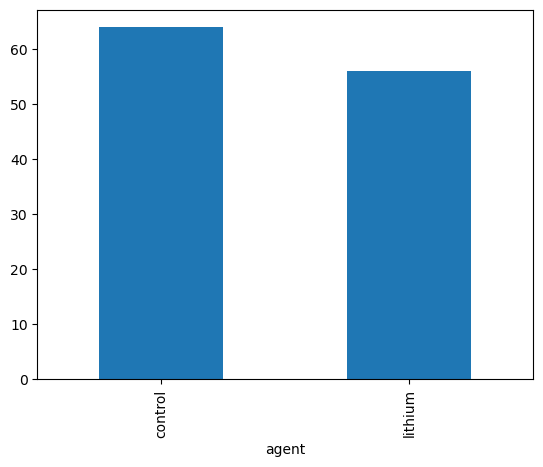

In [18]:
print(meta.groupby("agent").size())
meta.groupby("agent").size().plot.bar()

other
non-responder    94
responder        26
dtype: int64


<AxesSubplot: xlabel='other'>

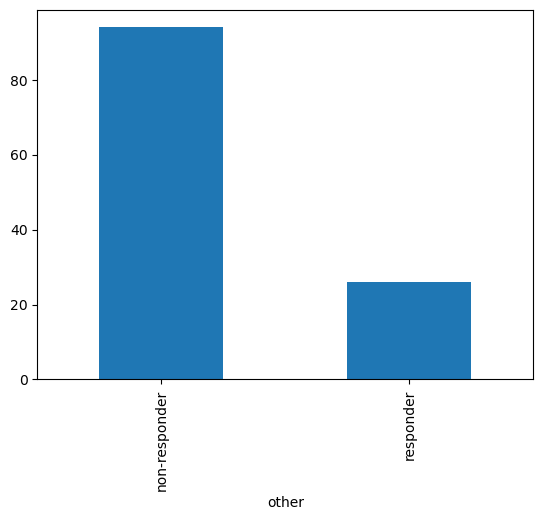

In [19]:
print(meta.groupby("other").size())
meta.groupby("other").size().plot.bar()

time
1 month     60
baseline    60
dtype: int64


<AxesSubplot: xlabel='time'>

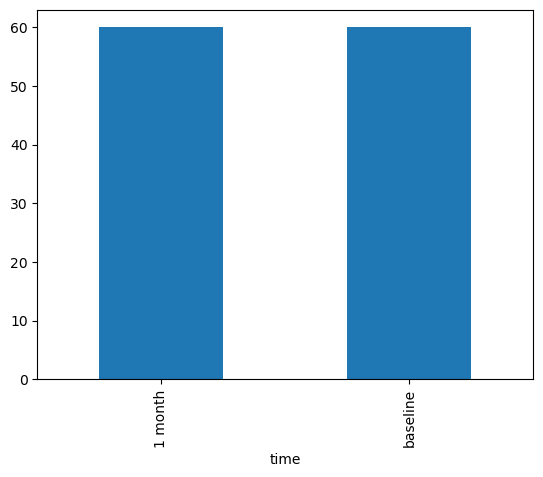

In [20]:
print(meta.groupby("time").size())
meta.groupby("time").size().plot.bar()

**Análise multivariada não supervisionada**

In [21]:
# pre-processamento: standardizacao dos dados
from sklearn import preprocessing

# re-escalonamento dos valores para ficarem dentro de limites normalizados 
# (distribuição normal com média 0 e variância 1) em cada variável
data_scaled = preprocessing.scale(data.values)
print("Media: ", data_scaled.mean())
print("Desvio padrao: ", data_scaled.std())

Media:  -2.7738738769753983e-16
Desvio padrao:  1.0000000000000004


[8.71316645e-02 4.40580788e-02 2.99399569e-02 2.77307872e-02
 2.28816659e-02 1.73148981e-02 1.54599396e-02 1.29427286e-02
 1.25065106e-02 1.18250164e-02 1.14910546e-02 1.08734400e-02
 1.05372538e-02 1.03432573e-02 1.01893161e-02 9.94983362e-03
 9.89666485e-03 9.56988687e-03 8.85361350e-03 8.73402885e-03
 8.53368032e-03 8.52277230e-03 8.36505305e-03 8.21199440e-03
 8.19486281e-03 8.01076903e-03 7.93039420e-03 7.87191947e-03
 7.77290956e-03 7.75768570e-03 7.75145911e-03 7.61174129e-03
 7.54735176e-03 7.41462957e-03 7.35188139e-03 7.33705737e-03
 7.30531131e-03 7.29504446e-03 7.25073517e-03 7.18003031e-03
 7.13468470e-03 7.11138544e-03 7.06537435e-03 7.04600003e-03
 6.95274830e-03 6.91065071e-03 6.89718145e-03 6.83360054e-03
 6.82105869e-03 6.74600046e-03 6.73357035e-03 6.70595849e-03
 6.67944706e-03 6.66507809e-03 6.62577294e-03 6.58757777e-03
 6.57054407e-03 6.55462040e-03 6.48844337e-03 6.46779094e-03
 6.41982578e-03 6.39585096e-03 6.37814597e-03 6.35647733e-03
 6.32446704e-03 6.318083

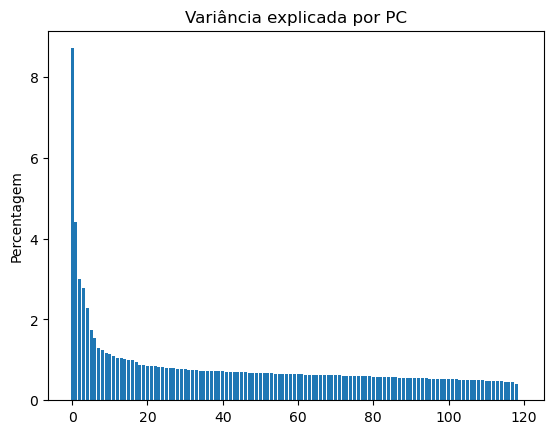

São necessários 99 componentes para explicar 90% da variabilidade dos dados.


In [22]:
from sklearn.decomposition import PCA
# Redução de dimensionalidade
# número de componentes para manter
n_components = 120
pca = PCA(n_components=n_components)

# Ajustar o PCA aos dados escalados
pca.fit(data_scaled)
# Transformar os dados usando as componentes principais
x_reduced = pca.transform(data_scaled)

print (pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_[:n_components]))

plt.bar(range(n_components), pca.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

# determinar o número de componentes principais necessários para explicar 90% da variabilidade dos dados
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.90)[0][0] + 1
print(f'São necessários {n_components} componentes para explicar 90% da variabilidade dos dados.')

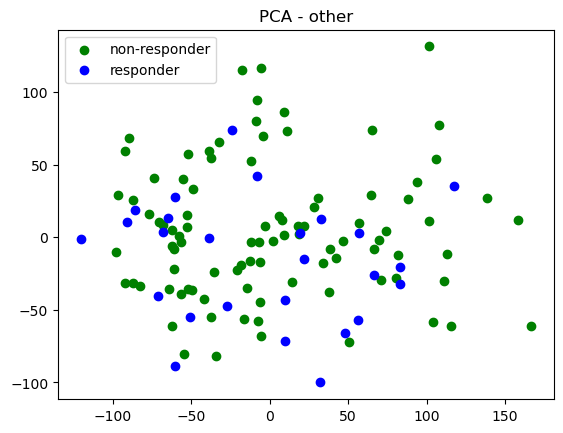

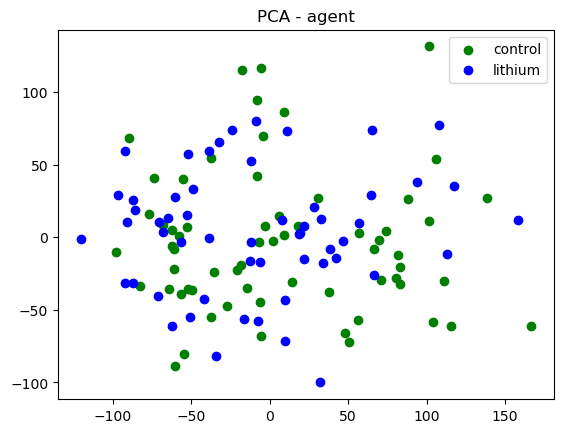

In [23]:
# Fazer um plot scatter mostrando cada uma das 2 classes com diferentes cores
for class_name in ['other','agent']:
    output_data = meta[class_name].values
    plt.figure()
    for c, name in zip("gb", meta[class_name].unique()):
        plt.scatter(x_reduced[output_data == name, 0], x_reduced[output_data == name, 1], c=c, label=name)
    plt.legend()
    plt.title('PCA - '+ class_name)
    plt.show()

**Clustering hierarquico dos dados, utilizando a métrica de distância "Manhattan”**

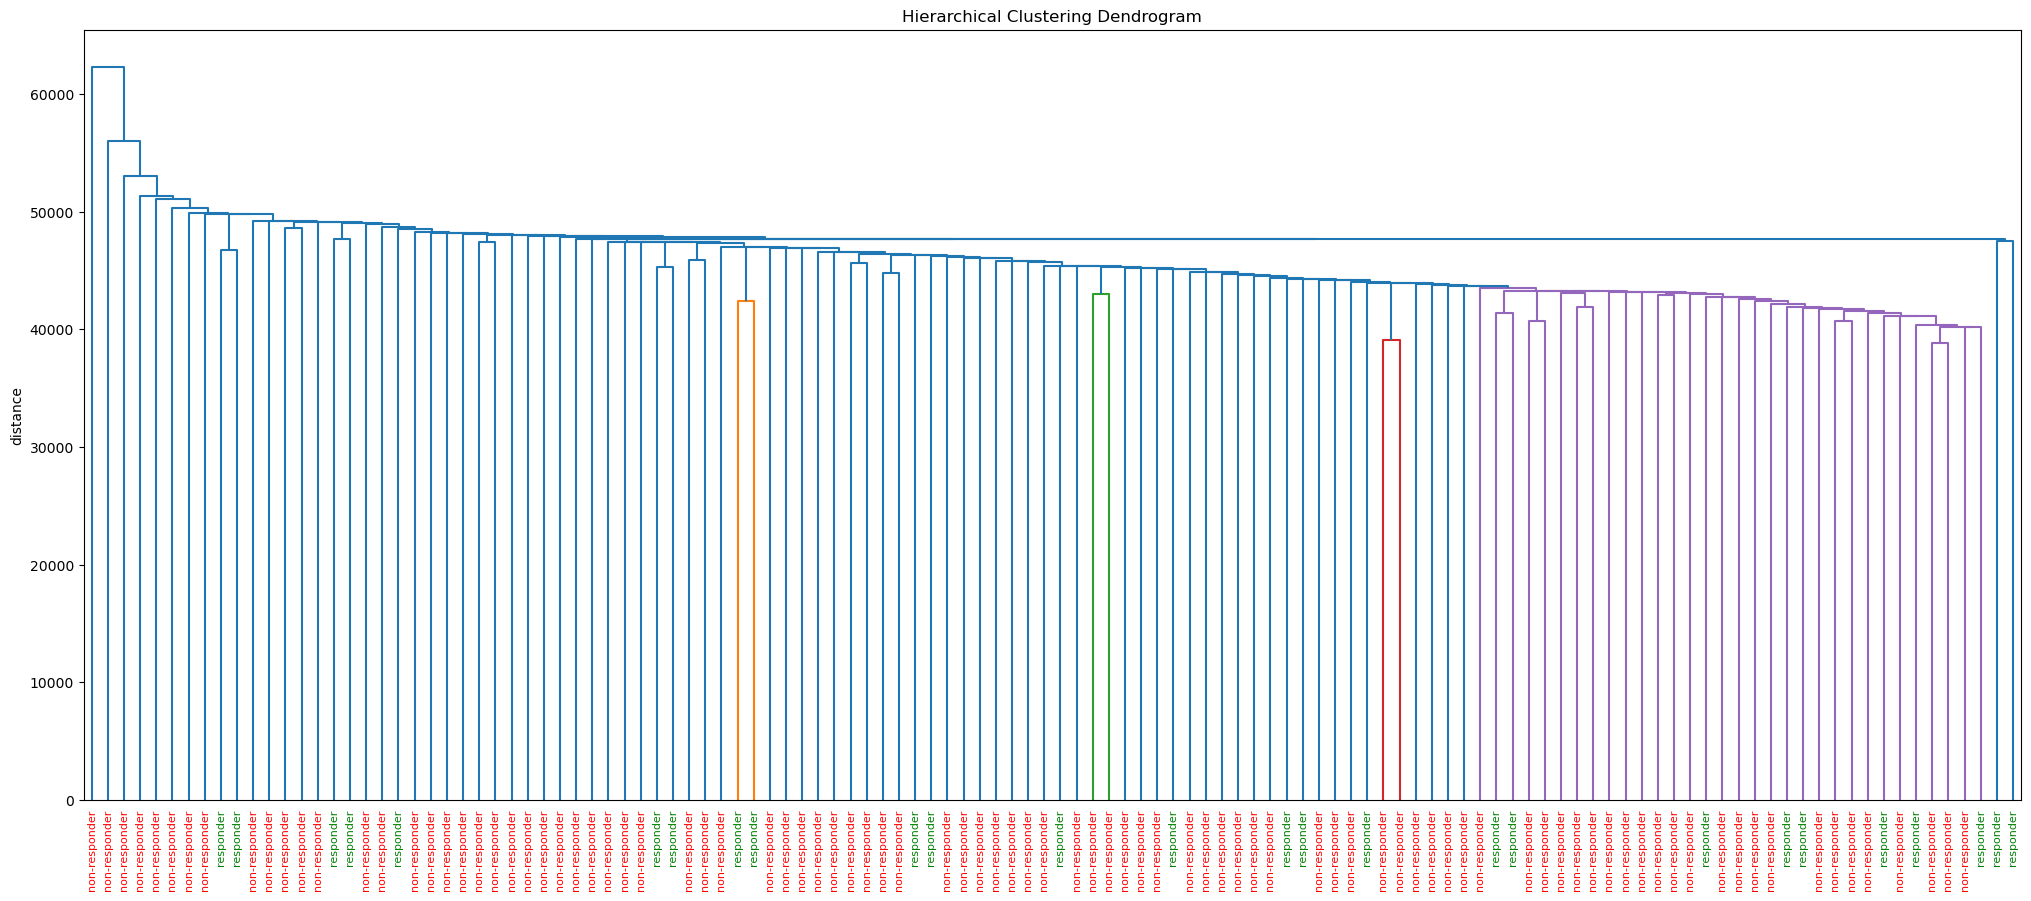

In [24]:
classe = 'other'

Z = linkage(data_scaled, metric='cityblock')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(meta[classe]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

# Assignment of colors to labels: 'a' is red, 'b' is green, etc.
label_colors = {'non-responder': 'r', 'responder': 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])
plt.show()


In [25]:
# clustering hierarquico
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

k=2
hclust = AgglomerativeClustering(n_clusters=k, affinity="manhattan", linkage="single")
hclust.fit(data_scaled)

output_bt = meta[classe].values
res_hc = hclust.labels_
pd.crosstab(output_bt, res_hc)

col_0,0,1
row_0,,
non-responder,93,1
responder,26,0


**Clustering k-means**

In [26]:
from sklearn.cluster import KMeans
# clustering k-means aos dados, com k = 2
k=2

kmeans = KMeans(n_clusters=k, max_iter=1000)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pd.crosstab(labels, meta[classe], rownames=['clusters'] )

other,non-responder,responder
clusters,,
0,58,13
1,36,13
